In [1]:
# Recreating k-armed bandit figures from Sutton and Barto, 2018 chapter 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter as gaussian_filter
from utils import *

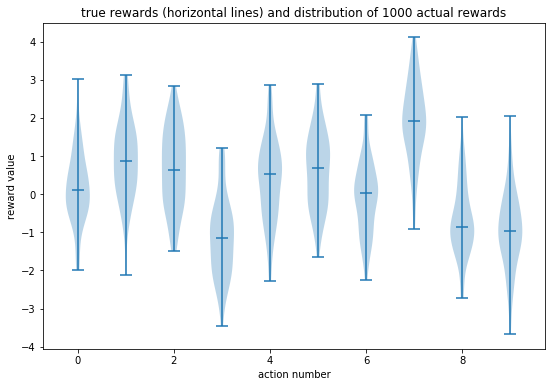

In [2]:
# fig 2.1
# takes k armed bandit, num steps, and optional epsilon in [0, 1] for greedy action-value sampling average
k = 10
q_stars = np.random.normal(size=(k))  # true values of each action
ts = 1000
eps = 1
sigma = 1

Q, N, As, Rs = simple_eps_greedy_bandit(k=k, q_stars=q_stars, timesteps=ts, eps=eps, sigma=sigma)
sorted_Rs = [Rs[np.where(As == i)] for i in np.arange(k)] # finds all Rewards for each Action
fig, ax1 = plt.subplots(figsize=(9,6))
ax1.violinplot(sorted_Rs, np.arange(k), showmedians=True)
plt.xlabel('action number')
plt.ylabel('reward value')
plt.title('true rewards (horizontal lines) and distribution of 1000 actual rewards')
plt.show()


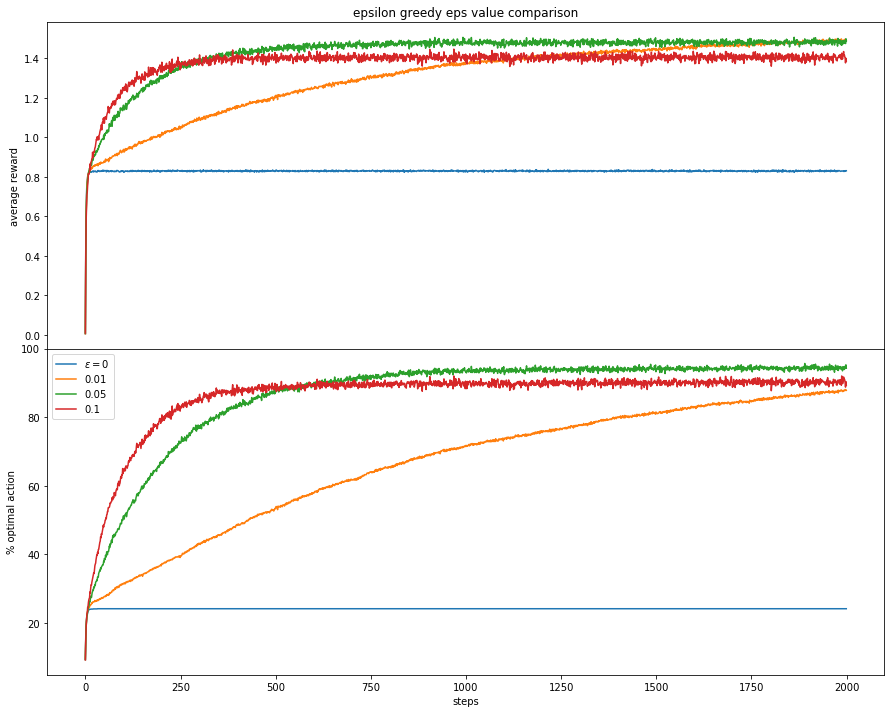

In [3]:
# fig 2.2
k = 10
runs = 2000
timesteps = 2000
sigma = .1
eps = [0, .01, .05, .1] # chance of choosing random action
labels = list(map(str, eps))
labels[0] = r'$\epsilon=0$'
q_stars = np.random.normal(size=(k, runs))
def static_rew(q_stars, t):
    return q_stars 

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 12), gridspec_kw={'hspace': 0})
for i in range(len(eps)):
    curr_eps = eps[i]
    avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, 
                                                   eps=curr_eps, rew_sigma=sigma,
                                                   dyn_rew_fn=static_rew)
    opt_counts = opt_act_count / runs
    ax[0].plot(np.arange(avg_rew.shape[0]), avg_rew, label=labels[i])
    ax[1].plot(np.arange(opt_counts.shape[0]), opt_counts*100, label=labels[i])

ax[0].set_ylabel('average reward')
ax[1].set_ylabel('% optimal action')
ax[1].set_xlabel('steps')
ax[0].set_title('epsilon greedy eps value comparison')
plt.legend()
plt.show()

# ex 2.1

# ex 2.2
Sample average value table for 4 armed bandit
1   2   3   4\n
0	0	0	0	--> A1 = 1, R1 = -1
-1	0	0	0	--> A2 = 2, R2 = 1
-1	1	0	0	--> A3 = 2, R3 = -2
-1	-.5	0	0	--> A4 = 2, R4 = 2 (def eps case)
-1	.3	0	0	--> A5 = 3, R5 = 0
-1	.3	0	0

eps case could have happened any of the other timesteps?

# ex 2.3


In [4]:
# ex 2.4

done
done
done
done


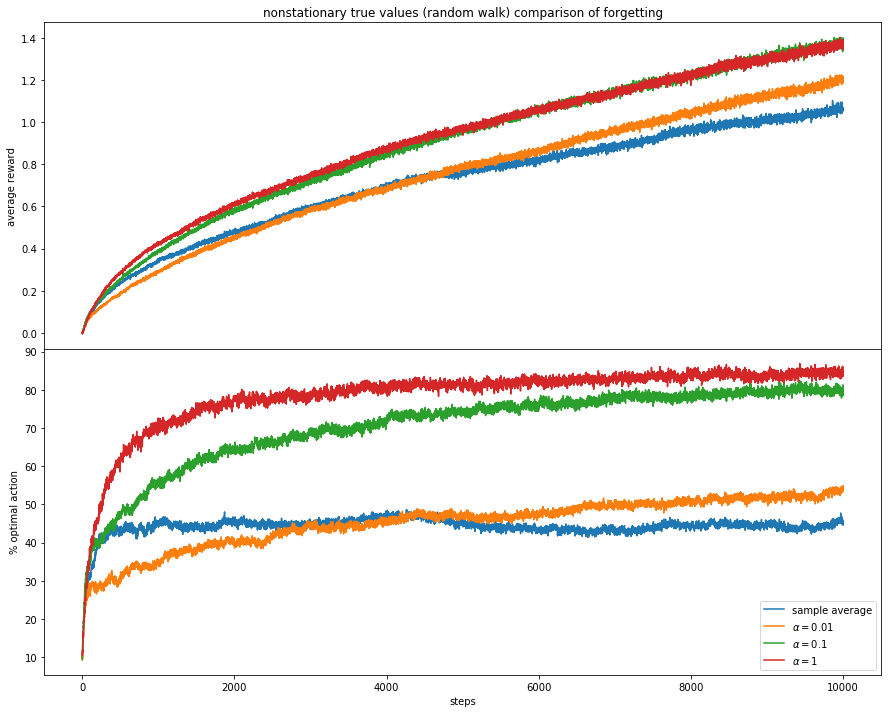

In [4]:
# ex 2.5
k = 10
runs = 2000
timesteps = 10000
sigma = 0.1
eps = .1
q_stars = np.zeros(shape=(k, runs))
labels = ['sample average', r'$\alpha=0.01$', r'$\alpha=0.1$', r'$\alpha=1$']
alphas = [None, 0.01, 0.1, 1]

def rand_walk_rew(q_stars, t):
    return q_stars + np.random.normal(size=q_stars.shape, scale=.01)

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 12), gridspec_kw={'hspace': 0})

for i in range(len(labels)):
    alpha = alphas[i]
    avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, 
                                                               eps=eps, rew_sigma=sigma,
                                                              dyn_rew_fn=rand_walk_rew, alpha=alpha)
    opt_counts = opt_act_count / runs
    ax[0].plot(np.arange(avg_rew.shape[0]), avg_rew, label=labels[i])
    ax[1].plot(np.arange(opt_counts.shape[0]), opt_counts*100, label=labels[i])
    print('done')

ax[0].set_ylabel('average reward')
ax[1].set_ylabel('% optimal action')
ax[1].set_xlabel('steps')
ax[0].set_title('nonstationary true values (random walk) comparison of forgetting')
plt.legend()
plt.show()

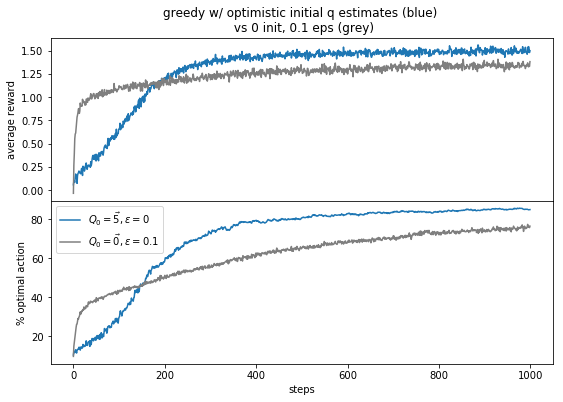

In [5]:
# fig 2.3
k = 10
runs = 2000
timesteps = 1000
sigma = 1
eps = [0, 0.1] # chance of choosing random action
alphas = [0.1, 0.1]
labels = [r'$Q_0=\vec{5}, \epsilon=0$', r'$Q_0=\vec{0}, \epsilon=0.1$']
colors = ['tab:blue', 'tab:gray']

q_stars = np.random.normal(size=(k, runs), loc=0, scale=1)

fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True,gridspec_kw={'hspace': 0})
for i in range(len(eps)):
    curr_eps = eps[i]
    if i == 0:
        avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps,
                                                       eps=curr_eps, rew_sigma=sigma,
                                                       alpha=alphas[i],
                                                       q_init=np.random.normal(loc=5, size=(k, runs)),
                                                       dyn_rew_fn=static_rew) # defined earlier
    else:
        avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, 
                                                       eps=curr_eps, rew_sigma=sigma, 
                                                       alpha=alphas[i], dyn_rew_fn=static_rew)
#     avg_rew = moving_average(avg_rew, 100)
#     opt_counts = moving_average(opt_counts, 100)
    opt_counts = 100*opt_act_count/runs
    ax[0].plot(np.arange(avg_rew.shape[0]), avg_rew, colors[i], label=labels[i])
    ax[1].plot(np.arange(opt_counts.shape[0]), opt_counts, colors[i], label=labels[i])

ax[0].set_title('greedy w/ optimistic initial q estimates (blue) \n vs 0 init, 0.1 eps (grey)')
ax[0].set_ylabel('average reward')
ax[1].set_ylabel('% optimal action')
ax[1].set_xlabel('steps')
plt.legend()
plt.show()

# ex 2.6

# ex 2.7

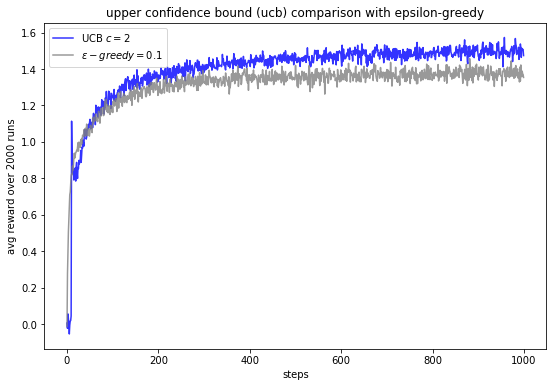

In [6]:
# fig 2.4

k = 10
runs = 2000
q_stars = np.random.normal(loc=0, scale=1, size=(k, runs))
timesteps = 1000
ucb_c = 2
rew_sigma = 1
eps = [0, 0.1] # chance of choosing random action
alphas = [None, None]
labels = ['UCB ' + r'$c=2$', r'$\epsilon-greedy = 0.1$']
colors = ['tab:blue', 'tab:gray']

avg_Rs, opt_act_count, curr_Qs_est = ucb_greedy_bandit(k, runs, q_stars, timesteps, ucb_c,
                                                       dyn_rew_fn=static_rew,
                                                       alpha=None, rew_sigma=rew_sigma)
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(avg_Rs, label=labels[0], color='b', alpha=.8)


avg_Rs, opt_act_count, curr_Qs_est = eps_greedy_bandit(k, runs, q_stars, timesteps, 
                                                       eps=0.1, dyn_rew_fn=static_rew,
                                                       alpha=None, q_init=None)
ax.plot(avg_Rs, label=labels[1], color='gray', alpha=0.8)
ax.set_xlabel('steps')
ax.set_ylabel('avg reward over 2000 runs')
ax.set_title('upper confidence bound (ucb) comparison with epsilon-greedy')
plt.legend()
plt.show()

# ex 2.8

# ex 2.9

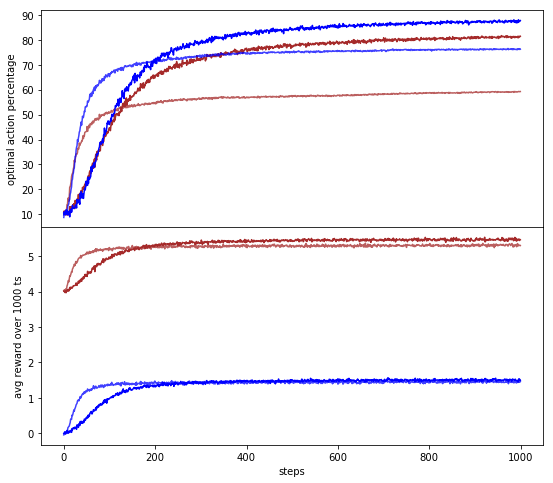

In [7]:
# fig 2.5 - gradient bandit
k = 10
runs = 2000
timesteps = 1000
sigma = 0.01
alpha = 0.4
q_stars = np.random.normal(0, scale=1, size=(k, runs))

fig, ax = plt.subplots(2, 1, figsize=(9,4*2), sharex=True, gridspec_kw={'hspace': 0})
colors = ['brown', 'blue']
alphas = [1, 0.75]
i, j = 0, 0
for q_stars in [np.random.normal(4, scale=1, size=(k, runs)), np.random.normal(0, scale=1, size=(k, runs))]:
    for alpha in [0.1, 0.4]:
        opt_act_count, avg_Rs = gradient_bandit(k, runs, q_stars, timesteps, alpha)
        opt_counts = 100*opt_act_count/runs
        ax[0].plot(opt_counts, color=colors[i], alpha=alphas[j%2])
        ax[1].plot(avg_Rs, color=colors[i], alpha=alphas[j%2])
        j += 1
    i += 1
ax[1].set_xlabel('steps')
ax[0].set_ylabel('optimal action percentage')
ax[1].set_ylabel('avg reward over 1000 ts')
plt.show()

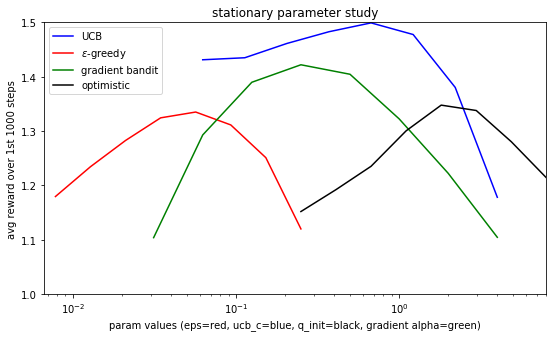

In [12]:
# fig 2.6
fig, ax = plt.subplots(figsize=(9,5))

k = 10
runs = 2000
timesteps = 1000
sigma = 1
# ucb c values
vals = np.logspace(base=2, start=-4, stop=2, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))
def rand_walk_rew(q_stars, t):
    return q_stars #+ np.random.normal(size=q_stars.shape, scale=.01)

data2 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    avg_rew, opt_act_count, Qs = ucb_greedy_bandit(k, runs, q_stars, timesteps, ucb_c=v, dyn_rew_fn=rand_walk_rew,
                                                   rew_sigma=1, alpha=None, q_init=None)
    data2[i, :] = np.mean(avg_rew)

ax.plot(vals, data2, label='UCB', color='b')

#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# epsilon values
vals = np.logspace(base=2, start=-7, stop=-2, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))
data1 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, dyn_rew_fn=rand_walk_rew,
                                                   eps=v, rew_sigma=sigma, 
                                                   alpha=None)
    data1[i, :] = np.mean(avg_rew)

ax.plot(vals, data1, label=r'$\epsilon$-greedy', color='r')

#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# greedy bandit alpha vals
vals = np.logspace(base=2, start=-5, stop=2, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))
data4 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    opt_act_count, avg_rew = gradient_bandit(k, runs, q_stars, timesteps, alpha=v)
    data4[i, :] = np.mean(avg_rew)

ax.plot(vals, data4, label='gradient bandit', color='g')


#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# optimistic values
vals = np.logspace(base=2, start=-2, stop=3, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))

data3 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, dyn_rew_fn=rand_walk_rew,
                                                   rew_sigma=sigma, alpha=.1, eps=,
                                                   q_init=np.random.normal(loc=v, size=(k, runs)))
    data3[i, :] = np.mean(avg_rew)

ax.plot(vals, data3, label='optimistic', color='k')
ax.set_xscale('log')
ax.set_xlim([1/150, 8])
ax.set_ylim([1, 1.5])

ax.set_title('stationary parameter study')
ax.set_xlabel('param values (eps=red, ucb_c=blue, q_init=black, gradient alpha=green)')
ax.set_ylabel('avg reward over 1st 1000 steps')
plt.legend()
plt.show()


In [ ]:
loop_funcs = [ucb_greedy_bandit, eps_greedy_bandit, ]

# ex 2.10

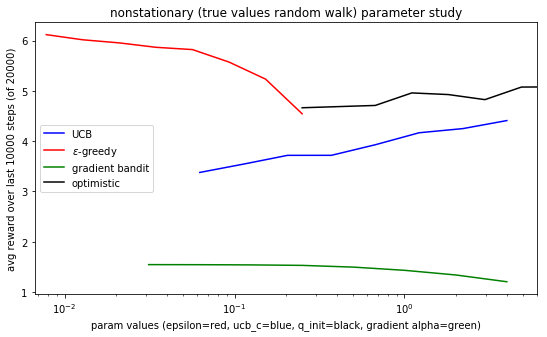

In [8]:
# ex 2.11 - shamelessly copied from fig 2.6 (takes a long while)
fig, ax = plt.subplots(figsize=(9,5))

k = 10
runs = 1000
timesteps = 200000
avg_consideration = int(timesteps / 2)
sigma = 1
# ucb c values
vals = np.logspace(base=2, start=-4, stop=2, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))
def rand_walk_rew(q_stars, t):
    return q_stars + np.random.normal(size=q_stars.shape, scale=.01)

data2 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    avg_rew, opt_act_count, Qs = ucb_greedy_bandit(k, runs, q_stars, timesteps, ucb_c=v, dyn_rew_fn=rand_walk_rew,
                                                   rew_sigma=1, alpha=None, q_init=None)
    data2[i, :] = np.mean(avg_rew[avg_consideration:])

ax.plot(vals, data2, label='UCB', color='b')

#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# epsilon values
vals = np.logspace(base=2, start=-7, stop=-2, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))
data1 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, dyn_rew_fn=rand_walk_rew,
                                                   eps=v, rew_sigma=sigma, 
                                                   alpha=0.1)
    data1[i, :] = np.mean(avg_rew[avg_consideration:])

ax.plot(vals, data1, label=r'$\epsilon$-greedy', color='r')

#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# greedy bandit alpha vals
vals = np.logspace(base=2, start=-5, stop=2, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))
data4 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    opt_act_count, avg_rew = gradient_bandit(k, runs, q_stars, timesteps, alpha=v)
    data4[i, :] = np.mean(avg_rew[avg_consideration:])

ax.plot(vals, data4, label='gradient bandit', color='g')


#-----------------------------------------------------------------------#
#-----------------------------------------------------------------------#
# optimistic values
vals = np.logspace(base=2, start=-2, stop=3, num=8)
q_stars = np.random.normal(0, scale=1, size=(k, runs))

data3 = np.empty(shape=(len(vals), 1))
for i in range(len(vals)):
    v = vals[i]
    avg_rew, opt_act_count, Qs = eps_greedy_bandit(k, runs, q_stars, timesteps, dyn_rew_fn=rand_walk_rew,
                                                   rew_sigma=sigma, alpha=.1, eps=0,
                                                   q_init=np.random.normal(loc=v, size=(k, runs)))
    data3[i, :] = np.mean(avg_rew[avg_consideration:])

ax.plot(vals, data3, label='optimistic', color='k')
ax.set_xscale('log')
ax.set_xlim([1/150, 6])
# ax.set_ylim([1, 1.5])

ax.set_title('nonstationary (true values random walk) parameter study')
ax.set_xlabel('param values (epsilon=red, ucb_c=blue, q_init=black, gradient alpha=green)')
ax.set_ylabel('avg reward over last 10000 steps (of 20000)')
plt.legend()
plt.show()
